In [2]:
# 1 -- imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 2 -- Generate Data 
# Generate X data plus feature scaling
def generate_X_data(X):
    X = 50 * np.random.rand(10,1)
    # Feature Scaling
    X_mu = X.mean()
    X_sigma = X.std()
    X = (X-X_mu)/X_sigma
    return X

In [4]:
# 2 -- generate y data
# y = 2*X+50+a small random number
def generate_y_data(y, X):
    b = 50 # bias
    w = 2  # weight
    small_random_number = 5*np.random.random()
    y = w*X+b+small_random_number
    y = np.array(y[:,0])
    return y

X data =  [[-1.19051283]
 [-0.58535179]
 [ 0.53476151]
 [ 0.8044503 ]
 [-1.17675138]
 [-0.40277264]
 [-1.26985691]
 [ 0.54555695]
 [ 1.15265249]
 [ 1.5878243 ]] 

y data =  [50.45125392 51.661576   53.90180259 54.44118018 50.47877681 52.0267343
 50.29256575 53.92339348 55.13758455 56.00792817] 



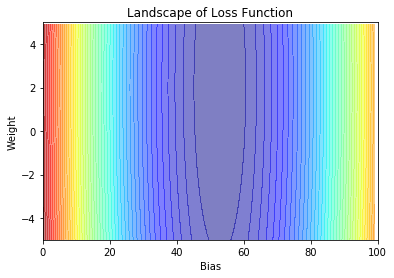

In [5]:
# 3 -- An example plot of the Landscape of a loss function 
X = 0
y = 0
X = generate_X_data(X)
y = generate_y_data(y, X)
bb = np.arange(0,100,1) #bias
ww = np.arange(-5, 5,0.1) #weight
Z = np.zeros((len(bb),len(ww)))
result_array = np.array([])
for i in range(len(bb)): 
    for j in range(len(ww)):
        b = bb[i]
        w = ww[j]
        Z[j][i] = 0
        for n in range(len(X)):
            Z[j][i] = (Z[j][i] + (w*X[n]+b - y[n])**2) # this is the loss 
        landscape = Z[j][i]/len(X)
    result_array = np.append(result_array, landscape)
print("X data = ", X, "\n")
print("y data = ", y,"\n")
plt.xlim(0,100)
plt.ylim(-5,5)
plt.contourf(bb,ww,Z, 50, alpha =0.5, cmap = plt.get_cmap('jet'))
plt.title("Landscape of Loss Function")
plt.xlabel("Bias")
plt.ylabel("Weight")
plt.plot(result_array, "k--")
plt.show()

In [6]:
# 4 -- Build a linear regression model using gradient descent 
# cost function used with my gradient descent method
# J(w) = 1/2m * sum(h - y)^2, where h = theta*X
def compute_cost(X,y,theta):
    m = len(y)
    h = (np.dot(X,theta))
    return np.sum(np.square(h - y)) / (2 * m)

In [7]:
# Gradient Descent is terminated by the number of iterations specified
# w := w - alpha*dl/dw
def gradient_descent(X, y, theta, alpha, iterations):
    J_history = np.zeros(iterations) 
    theta_history = np.zeros((iterations, 2)) # initialization of zeros
    for i in range(iterations):
        h = np.dot(X, theta)
        error = (h - y)
        theta = theta - ((alpha / m) * X.T.dot(error))
        theta_history[i, :] = theta.T
        J_history[i] = compute_cost(X, y, theta)
    return theta, J_history, theta_history

In [49]:
# Used for number 5 -- A method for testing different learning rates and/or iterations
def gradient_descent_testing(X,y,iterations, alpha,m):
    theta = np.zeros(2)
    X = np.column_stack((np.ones([m,1]), X)) # add a column of 1s to X --> bias 
    cost = compute_cost(X, y, theta)
    print("Testing gradient Descent---------\nlearning rate: ", alpha,
          "\nIterations: ", iterations, "\n")
    theta = gradient_descent(X, y, theta, alpha, iterations)
    print('cost function/ loss function is: \nJ(W) =', cost, "\n")
    print("Running regression line through data points....\n")
    bias = theta[0][0]
    weight = theta[0][1]
    X = np.array(X[:,1])
    reg_line = bias + X*weight
    plt.title("Model")
    plt.xlabel("X data")
    plt.ylabel("y data")
    plt.plot(X,y,'o', label = 'data points')
    plt.plot(X, reg_line, label = 'Regression Line')
    plt.legend(loc = 'best')
    return bias, weight

In [50]:
# Used for # 6 -  A method that tracks the changes of b and w 
def track_w_and_b(X,y,theta,iterations, alpha, m):
    theta = np.zeros(2)
    target_b = 50
    target_w = 2
    w = 2
    X = 0
    y = 0
    X = generate_X_data(X)
    y = generate_y_data(y, X)
    X = np.column_stack((np.ones([m,1]), X))
    theta, J_history, theta_history = gradient_descent(X, y, theta, alpha, iterations)
    bias = theta[0]
    weight = theta[1]
    
    
    b_history = theta_history[:,0]
    w_history = theta_history[:,1]
    print("Tracking w and b...")
    plt.xlim(0,100)
    plt.ylim(-5,5)
    plt.contourf(bb,ww,Z, 50, alpha =0.5, cmap = plt.get_cmap('jet'))
    plt.xlabel("b")
    plt.ylabel("w")
    plt.plot(b_history,w_history,'k--', color = "black", label = "b and w")
    plt.plot(target_b, target_w, "x", label = "Target b and w", color = "red" )
    plt.legend(loc = 'best')

In [51]:
# A method to visualize gradient descent 
def gradient_descent_graph(X, y, theta, alpha, iterations):
    print("Visualization of gradient descent\n")
    J_history = np.zeros(iterations) 
    theta_history = np.zeros((iterations, 2)) # initialization
    for i in range(iterations):
        h = np.dot(X, theta)
        error = (h - y)
        theta = theta - ((alpha / m) * X.T.dot(error))
        theta_history[i, :] = theta.T
        J_history[i] = compute_cost(X, y, theta)
    plt.title("Gradient Descent Visualization")
    plt.xlabel("Iterations")
    plt.ylabel("J(w)")
    plt.plot(J_history, "k--", label = "cost", color = "black")
    plt.legend(loc = 'best')

In [52]:
# Used for # 7 A method to predict y after gradient descent optimization
def target_prediction(bias, weight, x_value):
    y_predict = bias + x_value*weight
    return y_predict

In [53]:
# Used for # 7 in x to find out actual y from original equation 
def actual_value(x_value):
    y_actual = 50+2*x_value+5*np.random.random()
    return y_actual

In [54]:
# normal equation predictions -- Extra
# Theta_hat = (X_transpose * X)^-1 *X_transpose * y
def normal_equation(X,y):
    X = np.column_stack((np.ones([10,1]), X))
    theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta_best

In [55]:
# Used for 5 and 7 A method to plug in different alphas and get the result after gradient descent 
def test_different_alphas(X, y, alpha, iterations, x_value, m):
    b = 50
    w = 2
    bias, weight = gradient_descent_testing(X,y,iterations,alpha,m)
    model_prediction = target_prediction(bias, weight, x_value)
    actual_result = actual_value(x_value)
    theta_best = normal_equation(X, y)
    normal_equation_predict = theta_best[0]+theta_best[1] * x_value
    print("Learnine Rate = ", alpha, "\nIterations = ", iterations,
      "\nEstimated b = ",bias, "\nEstimated w = ",weight, 
      "\nx = ", x_value,
      "\nActual b =",b,"\nActual w = ",w,
      "\nModel prediction for x = ",x_value," is ", model_prediction,
      "\nActual value from equation y = 50+2*(",x_value,")+5*np.random.random() is ", actual_result,
      "\nParameter predictions (b and w) using normal equation is b = ", theta_best[0], "and w = ",theta_best[1],
      "\nEstimated value with normal equation = ", normal_equation_predict)

In [56]:
# some variable initilizations and pick a x value to test model
X = 0 
y = 0
theta = np.zeros(2)
X = generate_X_data(X)
y = generate_y_data(y, X)
print("X data = ", X, "\n")
print("y data = ", y)
n = 9 
m = len(y)
x_value = X[n] # x value is from the array X in the nth position
print(" x value from X = ",x_value)
m = len(y)

X data =  [[-0.93228849]
 [-0.83871167]
 [ 1.27227315]
 [ 1.07379983]
 [-0.85952465]
 [-0.78843422]
 [-0.99001313]
 [ 1.12503509]
 [ 1.36604972]
 [-0.42818563]] 

y data =  [51.09012707 51.27728072 55.49925035 55.10230371 51.23565474 51.37783562
 50.97467779 55.20477422 55.68680349 52.09833278]
 x value from X =  [-0.42818563]


Testing gradient Descent---------
learning rate:  0.1 
Iterations:  2000 

cost function/ loss function is: 
J(W) = 1404.1003404650596 

Running regression line through data points....

Learnine Rate =  0.1 
Iterations =  2000 
Estimated b =  52.95470404912217 
Estimated w =  1.9999999999999971 
x =  [-0.42818563] 
Actual b = 50 
Actual w =  2 
Model prediction for x =  [-0.42818563]  is  [52.09833278] 
Actual value from equation y = 50+2*( [-0.42818563] )+5*np.random.random() is  [51.6022305] 
Parameter predictions (b and w) using normal equation is b =  52.954704049122206 and w =  1.9999999999999982 
Estimated value with normal equation =  [52.09833278]


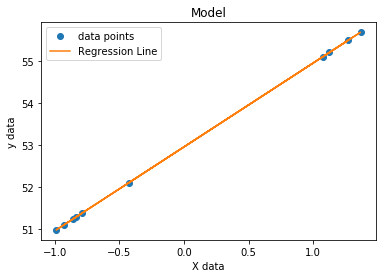

In [57]:
# 5 and 7 - Testing learning rate = 0.1 and iterations = 2000
alpha = 0.1
iterations = 2000
test_different_alphas(X,y,alpha, iterations, x_value, m)

Testing gradient Descent---------
learning rate:  0.001 
Iterations:  2000 

cost function/ loss function is: 
J(W) = 1404.1003404650596 

Running regression line through data points....

Learnine Rate =  0.001 
Iterations =  2000 
Estimated b =  45.79523201223424 
Estimated w =  1.7296001492049986 
x =  [-0.42818563] 
Actual b = 50 
Actual w =  2 
Model prediction for x =  [-0.42818563]  is  [45.05464208] 
Actual value from equation y = 50+2*( [-0.42818563] )+5*np.random.random() is  [49.17689739] 
Parameter predictions (b and w) using normal equation is b =  52.954704049122206 and w =  1.9999999999999982 
Estimated value with normal equation =  [52.09833278]


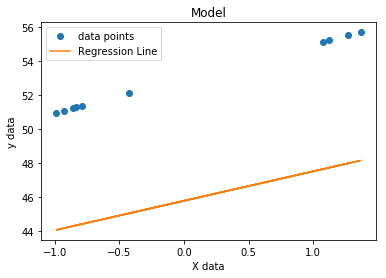

In [58]:
# 5 and 7 - testing alpha = 0.001 and iterations = 2000
alpha = 0.001
iterations = 2000
test_different_alphas(X,y,alpha, iterations, x_value, m)

Testing gradient Descent---------
learning rate:  0.001 
Iterations:  20000 

cost function/ loss function is: 
J(W) = 1404.1003404650596 

Running regression line through data points....

Learnine Rate =  0.001 
Iterations =  20000 
Estimated b =  52.95470394106124 
Estimated w =  1.9999999959187365 
x =  [-0.42818563] 
Actual b = 50 
Actual w =  2 
Model prediction for x =  [-0.42818563]  is  [52.09833268] 
Actual value from equation y = 50+2*( [-0.42818563] )+5*np.random.random() is  [52.8936093] 
Parameter predictions (b and w) using normal equation is b =  52.954704049122206 and w =  1.9999999999999982 
Estimated value with normal equation =  [52.09833278]


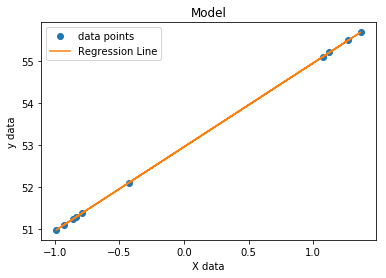

In [59]:
# 5 and 7- testing alpha = 0.001 and iterations = 20000
alpha = 0.001
iterations = 20000
test_different_alphas(X,y,alpha, iterations, x_value, m)

Testing gradient Descent---------
learning rate:  0.1 
Iterations:  200 

cost function/ loss function is: 
J(W) = 1404.1003404650596 

Running regression line through data points....

Learnine Rate =  0.1 
Iterations =  200 
Estimated b =  52.95470401176223 
Estimated w =  1.9999999985889834 
x =  [-0.42818563] 
Actual b = 50 
Actual w =  2 
Model prediction for x =  [-0.42818563]  is  [52.09833275] 
Actual value from equation y = 50+2*( [-0.42818563] )+5*np.random.random() is  [52.34391127] 
Parameter predictions (b and w) using normal equation is b =  52.954704049122206 and w =  1.9999999999999982 
Estimated value with normal equation =  [52.09833278]


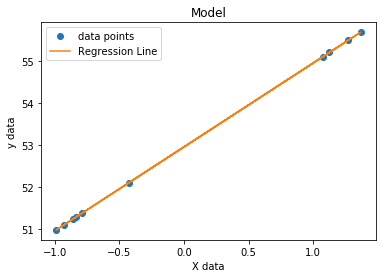

In [60]:
# 5 and 7 - testing alpha = 0.1 and iterations = 200
alpha = 0.1
iterations = 200
test_different_alphas(X,y,alpha, iterations, x_value, m)

Tracking w and b...


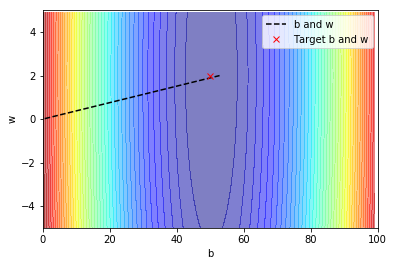

In [61]:
alpha = 0.01
iterations = 1500
track_w_and_b(X,y,theta,iterations, alpha, m)

Tracking w and b...


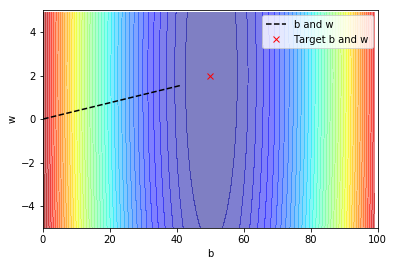

In [62]:
alpha = 0.001
iterations = 1500
track_w_and_b(X,y,theta,iterations, alpha, m)

Tracking w and b...


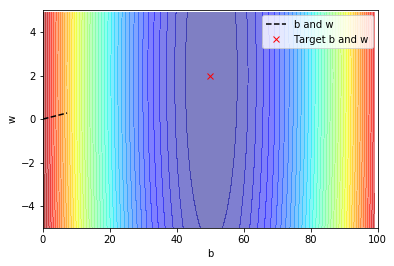

In [63]:
alpha = 0.0001
iterations = 1500
track_w_and_b(X,y,theta,iterations, alpha, m)

Visualization of gradient descent



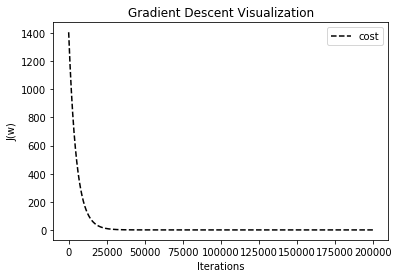

In [64]:
# Visualization of gradient descent 
theta = np.zeros(2)
X = 0
X = generate_X_data(X)
X = np.column_stack((np.ones([m,1]), X))
iterations = 200000
alpha = 0.0001
gradient_descent_graph(X, y, theta, alpha, iterations)

Visualization of gradient descent



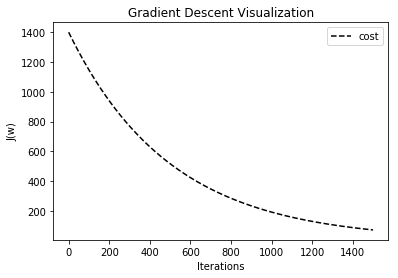

In [65]:
# Visualization of gradient descent 
theta = np.zeros(2)
X = 0
X = generate_X_data(X)
X = np.column_stack((np.ones([m,1]), X))
iterations = 1500
alpha = 0.001
gradient_descent_graph(X, y, theta, alpha, iterations)

In [66]:
def more_plots(alpha, iteration):
    theta = np.zeros(2)
    X = 0
    y = 0
    b_target = 50
    w_target = 2
    X = generate_X_data(X)
    y = generate_y_data(y, X)
    X = np.column_stack((np.ones([m,1]), X))
    theta, J_history, theta_history = gradient_descent(X, y, theta, alpha, iterations)
    bias = theta[0]
    weight = theta[1]
    
    b_history = theta_history[:,0]
    w_history = theta_history[:,1]
    
    plt.subplot(2, 2, 1)
    plt.title("Gradient Descent")
    plt.xlabel("Iterations")
    plt.ylabel("J(w)")
    plt.plot(J_history, "k--", label = "cost", color = "black")
    plt.legend(loc = 'best')

    plt.subplot(2, 2, 2)
    X_b = np.array(X[:,1])
    reg_line = bias + X_b*weight
    plt.title("Model")
    plt.xlabel("X data")
    plt.ylabel("y data")
    plt.plot(X_b,y,'o')
    plt.plot(X_b, reg_line)
    
    plt.subplot(2, 2, 3)
    plt.xlim(0,100)
    plt.ylim(-5,5)
    plt.contourf(bb,ww,Z, 50, alpha =0.5, cmap = plt.get_cmap('jet'))
    plt.xlabel("b")
    plt.ylabel("w")
    plt.plot(b_history,w_history,'k--', color = "black", label = "b and w")
    plt.plot(b_target, w_target, "x", label = "Target b and w", color = "red" )
    plt.legend(loc = 'best')

In [67]:
def print_plots(alpha, iterations):
    print("With Learning Rate = ", alpha, "and iterations = ",iterations,":\n")
    print("1) Top left corner is a visualization of gradient descent\n")
    print("2) Top right corner is a visualization of the model (yellow line) and the actual data points (blue dots)\n")
    print("3) Bottom left corner is a visualization of b and w values (black x marks the final b and w values)\n")
    print("4) Bottom right corner is a plot of the landscape")
    print("\n")
    result_array = more_plots(alpha, iterations)
    print("Plots....")

With Learning Rate =  0.0001 and iterations =  1500 :

1) Top left corner is a visualization of gradient descent

2) Top right corner is a visualization of the model (yellow line) and the actual data points (blue dots)

3) Bottom left corner is a visualization of b and w values (black x marks the final b and w values)

4) Bottom right corner is a plot of the landscape


Plots....


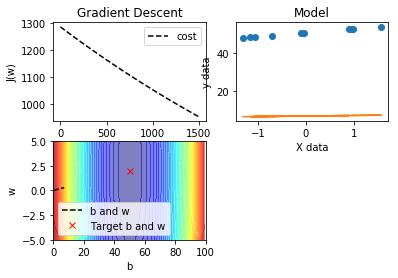

In [68]:
alpha = 0.0001
iterations = 1500
print_plots(alpha, iterations)

With Learning Rate =  0.0001 and iterations =  15000 :

1) Top left corner is a visualization of gradient descent

2) Top right corner is a visualization of the model (yellow line) and the actual data points (blue dots)

3) Bottom left corner is a visualization of b and w values (black x marks the final b and w values)

4) Bottom right corner is a plot of the landscape


Plots....


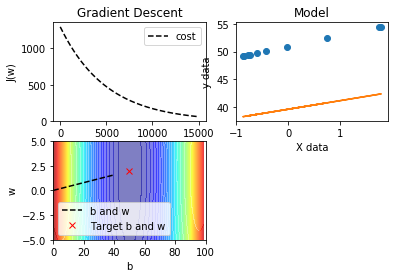

In [69]:
alpha = 0.0001
iterations = 15000
print_plots(alpha, iterations)

With Learning Rate =  0.01 and iterations =  1500 :

1) Top left corner is a visualization of gradient descent

2) Top right corner is a visualization of the model (yellow line) and the actual data points (blue dots)

3) Bottom left corner is a visualization of b and w values (black x marks the final b and w values)

4) Bottom right corner is a plot of the landscape


Plots....


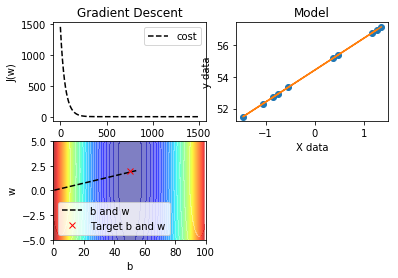

In [70]:
alpha = 0.01
iterations = 1500
print_plots(alpha, iterations)